# 6 Pandasを使ったデータ加工処理

6章では、2章で基礎を学んだPandasについて、さらに詳しく学んでいきます。Pandasは2章で学んだように、ある条件を満たすデータを抽出したり、操作するなど、さまざまな機能があります。さらに、特定の軸で集計したり、データ同士をつなげたり、欠けているデータを補ったり、時系列データを一括計算したり、複雑な処理も柔軟に行うことができます。Pandasは後半の章や、機械学習のモデルを適応させる前のいわゆる前処理でもよく使うことになりますので、この章はしっかりと学習してください。


ゴール：Pandasを使ったデータの抽出、操作、処理方法の知識を深める

- **[6.1 概要と事前準備](#6.1-概要と事前準備)**
    - [6.1.1 この章で使うライブラリのインポート](#6.1.1-この章で使うライブラリのインポート)
<br><br>
- **[6.2 Pandasの基本的なデータ操作](#6.2-Pandasの基本的なデータ操作)**
    - [6.2.1 階層型インデックス](#6.2.1-階層型インデックス)
    - [6.2.2 データの結合](#6.2.2-データの結合)
    - [6.2.3 データの操作と変換](#6.2.3-データの操作と変換)
    - [6.2.4 データの集約とグループ演算](#6.2.4-データの集約とグループ演算)
<br><br>
- **[6.3 欠損データと異常値の取り扱いの基礎](#6.3-欠損データと異常値の取り扱いの基礎)**
    - [6.3.1 欠損データの扱い方](#6.3.1-欠損データの扱い方)
    - [6.3.2 異常データの扱い方](#6.3.2-異常データの扱い方)
<br><br>
- **[6.4 時系列データの取り扱いの基礎](#6.4-時系列データの取り扱いの基礎)**
    - [6.4.1 時系列データの処理と変換](#6.4.1-時系列データの処理と変換)
    - [6.4.2 移動平均](#6.4.2-移動平均)
<br><br>
- **[6.5 総合問題](#6.5-総合問題)**
    - [■総合問題6-1 データ操作](#■総合問題6-1-データ操作)

***

## 6.1 概要と事前準備

キーワード：Numpy、Scipy、Pandas

この章ではPandasを使ったデータ加工処理について、もう少し詳しく学んでいきます。Pandasは2章で学んだように、ある条件を満たすデータを抽出したり、操作したりするなど、さまざまな機能があります。

たとえば、全国の小学校で同じ算数のテストを実施したケースを考えてみます。
それぞれの都道府県の最高点取得者だけを抜き出したいこともあるでしょうし、それぞれの都道府県の平均点を出したいこともあるでしょう。このように、さまざまな集計軸があります。さらに、都道府県×学校×クラスの3軸で平均値を算出したい場合や、さらに男女で計算したい場合など、軸が複数になっているケースもあります。Pandasを使えば、そのような集計をすることもできます。また、他のデータ（たとえば、国語の試験結果）とつなげたいときも、キー（各学生に与えられた一意となるデータなど）があれば、結合して1つの`DataFrame`オブジェクトにして、まとめて処理できます。

そのほか、時系列データを扱うときもPandasは役に立ちます。
たとえば、ある店舗の日時の売上推移データを取り扱うときに、1週間や1か月ごとの平均値の推移を簡単に計算することができます。これらのプログラムをいちから記述するとなると大変ですが、Pandasではこのような計算も1～2行ほどのコードを書くだけで実行できます。さらに、データに欠損値や何か異常値が入っているとき、それらを何らかの方法で一括処理したい場合にも使えます。

もちろん、これらの処理は自分で、いちからPythonのプログラムを書くことで対応できますが、実装するのに時間がかかります。それに比べてPandasの機能を使えば、簡単に操作できます。また、 機械学習のモデルを構築するときは、そのアルゴリズムが使えるようにデータを前処理する必要があります。たとえば、縦に並んでいたデータのカラムを横に並べたい場面などもあり、そういった操作もPandasなら簡単にできます。

上記のようなデータ操作をする場合、SQLやエクセルのピボットテーブルなどを使っても処理できますが、Pythonのプログラムだけで一貫してコーディングしたい場合はPandasを使うと便利です。
なおPandasには、グラフの描画機能もあり、ハンドリングしたデータをグラフとしてすぐに描画できます。データのグラフ化については7章でみていくことにします。

### 6.1.1 この章で使うライブラリのインポート

この章では、2章で紹介した各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

In [0]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

## 6.2 Pandasの基本的なデータ操作
ゴール：Pandasの階層型インデックスを使える、データの結合ができる、groupbyメソッドなどを使って集計処理ができる

まずは、Pandasの基本的なデータ操作から始めます。

### 6.2.1 階層型インデックス
キーワード：階層型インデックス


データを複数軸で集計したいとき、設定すると便利なのが**階層型インデックス**です。
2章でPandasのインデックスについて少し扱いましたが、インデックスとは索引やラベルのようなイメージです。2章では、1つのインデックスだけを扱いましたが、この章の冒頭で説明したように、複数の軸で階層的にインデックスを設定したいこともあります。階層的にインデックスを設定することで、各階層ごとに集計が可能になり、便利です。

次に示すデータセットは、インデックスを2段構造で設定した例です。インデックスを設定するには、`index`パラメータにその値を指定します。この例では、1階層目のインデックスとして`a`と`b`、2階層目のインデックスとして`1`と`2`を設定しています。

また、列の側につけるカラムとして、1階層目に`Osaka`、`Tokyo`、`Osaka`、2階層目に`Blue`、`Red`、`Red`を設定しています。


In [0]:
# 3列3行のデータを作成し、インデックスとカラムを設定
hier_df= DataFrame(
    np.arange(9).reshape((3,3)),
    index = [
        ['a','a','b'],
        [1,2,2]
    ], 
    columns = [
        ['Osaka','Tokyo','Osaka'],
        ['Blue','Red','Red']
    ]
)
hier_df

これらのインデックスやカラムには、名前をつけることもできます。

In [0]:
# indexに名前を付ける
hier_df.index.names =['key1','key2']
# カラムに名前を付ける
hier_df.columns.names =['city','color']
hier_df

#### カラムの絞り込み

ここでたとえば、カラムの`city`が`Osaka`のデータだけを見たいとしましょう。次のようにすると、グループの絞り込みができます。

In [0]:
hier_df['Osaka']

#### インデックスを軸にした集計

次はインデックスを軸にした集計の例です。以下の例は、`key2`を軸に合計を計算する例です。

In [0]:
# 階層ごとの要約統計量：行合計
hier_df.sum(level = 'key2', axis = 0)

同様にして、`color`を軸に合計を計算する場合は、次のようにします。列方向に合計する場合は、`axis`パラメータを1に設定します。

In [0]:
# 列合計
hier_df.sum(level = 'color', axis = 1)

#### インデックスの要素の削除

あるインデックスを削除したい場合は、`drop`メソッドを使います。`drop`メソッドを使うと、インデックスの要素を削除できます。次の例では、`key1`の`b`を削除しています。

In [0]:
hier_df.drop(['b'])

#### <練習問題 6-1>

次のデータに対して、`Kyoto`の列だけ抜き出してみましょう。

In [0]:
hier_df1 = DataFrame(
    np.arange(12).reshape((3,4)),
    index = [['c','d','d'],[1,2,1]],
    columns = [
        ['Kyoto','Nagoya','Hokkaido','Kyoto'],
        ['Yellow','Yellow','Red','Blue']
    ]
)

hier_df1.index.names = ['key1','key2']
hier_df1.columns.names = ['city','color']
hier_df1

#### <練習問題 6-2>

<練習問題 6-1>のデータに対して、`city`をまとめて列同士の平均値を出してください。

#### <練習問題 6-3>

<練習問題 6-1>のデータに対して、`key2`ごとに行の合計値を算出してみましょう。


### 6.2.2 データの結合
キーワード：内部結合、外部結合、縦結合

データの結合については2章で少し学びました。データを結合したいケースは多々あり、データをつなげることで集計がしやすくなったり、新しい軸における値がわかったりします。ぜひ、マスターしてください。
ただし、結合と言っても、さまざまなパターンがあります。以下でそれらを紹介していきます。

まずは、この節でサンプルとして使う結合の対象となるデータを準備します。ここでは次に提示する`data1`（以下、データ1）と`data2`（以下、データ2）の2つのデータを使います。

In [0]:
# データ1の準備
data1 = {
    'id': ['100', '101', '102', '103', '104', '106', '108', '110', '111',' 113'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru','Mitsuo']
}
df1 = DataFrame(data1)
df1

In [0]:
# データ2の準備
data2 = {
    'id': ['100', '101', '102', '105', '107'],
    'math': [50, 43, 33, 76, 98],
    'english': [90, 30, 20, 50, 30],
    'sex': ['M','F','F','M','M'], 
    'index_num': [0, 1, 2, 3, 4]
}
df2 = DataFrame(data2)
df2

### 結合

では、この2つのデータを結合する方法を見ていきましょう。
データ1とデータ2を結合する方法は、次の4パターンが考えられます。

①内部結合（INNER JOIN）
両方にキーがあるときに結合します。

②全結合（FULL JOIN）
どちらかにキーがあるときに結合します。

③左外部結合（LEFT JOIN）
左側にあるデータのキーがある時に結合します。

④右外部結合（RIGHT JOIN）
右側にあるデータのキーがある時に結合します。

ここでは主に、「内部結合」と「（左）外部結合」を使います。この2つを理解しておいてください。

（※図は書籍を参照してください※）

#### 内部結合
mergeメソッドの結合方法のデフォルトは内部結合です。上記のデータ2つに対して、`id`をキーとして内部結合すると、以下のようになります。`on`パラメータでキーを指定します。

In [0]:
# データのマージ（内部結合。キーは自動的に認識されるが、onで明示的に指定可能）
print('・結合テーブル')
pd.merge(df1, df2, on = 'id')

`id`の値が両方の`Dataframe`オブジェクトに存在するものみが表示されました。

#### 全結合
次の例は、どちらのデータにも存在するデータで結合しています。これが全結合です。全結合では`how`パラメータに`outer`を指定します。結合する値がない場合は、`NaN`になります。

In [0]:
# データのマージ（全結合）
pd.merge(df1, df2, how = 'outer')

なお、`left_index`パラメータや`right_on`パラメータを使うと、キーをインデックスで指定して結合できます。次の例は、左側のデータのインデックスと、右側のデータのindex_numカラムをキーとして指定するものです。

In [0]:
# index によるマージ
pd.merge(df1, df2, left_index = True, right_on = 'index_num')

#### 左外部結合
左外部結合は`how`パラメータに`left`を指定します。次の例は、左側のテーブル（ひとつめの引数）に合わせて、`Dataframe`オブジェクトのデータを結合するものです。左側に対応するデータが右（ふたつめの引数）にない場合は、`NaN`になります。

In [0]:
# データのマージ（left）
pd.merge(df1, df2, how = 'left')

#### 縦結合

これまでは、何らかのキーに紐付いてデータをマージしていましたが、`concat`メソッドを使うと、データを縦方向に積み上げられます。これを縦結合と言います。

In [0]:
# データ3の準備
data3 = {
    'id': ['117', '118', '119', '120', '125'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1990, 1989, 1992, 1997, 1982],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df3 = DataFrame(data3)
df3

In [0]:
# concat 縦結合
concat_data = pd.concat([df1,df3])
concat_data

#### <練習問題 6-4>

下記の2つのデータテーブルに対して、内部結合してみましょう。

In [0]:
# データ4の準備
data4 = {
    'id': ['0', '1', '2', '3', '4', '6', '8', '11', '12', '13'],
    'city': ['Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo', 'Tokyo', 'Osaka', 'Kyoto', 'Hokkaido', 'Tokyo'],
    'birth_year': [1990, 1989, 1992, 1997, 1982, 1991, 1988, 1990, 1995, 1981],
    'name': ['Hiroshi', 'Akiko', 'Yuki', 'Satoru', 'Steeve', 'Mituru', 'Aoi', 'Tarou', 'Suguru', 'Mitsuo']
}
df4 = DataFrame(data4)
df4

In [0]:
# データ5の準備
data5 = {
    'id': ['0', '1', '3', '6', '8'],
    'math' : [20, 30, 50, 70, 90],
    'english': [30, 50, 50, 70, 20],
    'sex': ['M', 'F', 'F', 'M', 'M'],
    'index_num': [0, 1, 2, 3, 4]
}
df5 = DataFrame(data5)
df5

#### <練習問題  6-5>

<練習問題 6-4>のデータを使って、`df4`をベースに`df5`のテーブルを全結合してみましょう。

#### <練習問題 6-6>
<練習問題 6-4>のデータを使って、`df4`に対して、以下のデータを縦結合してみましょう。

In [0]:
# データの準備
data6 = {
    'id': ['70', '80', '90', '120', '150'],
    'city': ['Chiba', 'Kanagawa', 'Tokyo', 'Fukuoka', 'Okinawa'],
    'birth_year': [1980, 1999, 1995, 1994, 1994],
    'name': ['Suguru', 'Kouichi', 'Satochi', 'Yukie', 'Akari']
}
df6 = DataFrame(data6)

### 6.2.3 データの操作と変換
キーワード：データのピボット操作、重複データ、マッピング、ビン分割

次に、データの操作と変換（ピボット操作、データの重複があった場合の処理、マッピング、ビン分割など）について扱っていきましょう。

#### ピボット操作
まずは、データのピボット操作について学びます。ピボット操作とは、行を列に、列を行にする操作です。もう一度、これまで使ってきた階層テーブル`hier_df`を例に考えます。

In [0]:
# hier_dfを用意
hier_df= DataFrame(
    np.arange(9).reshape((3, 3)),
    index = [
        ['a', 'a', 'b'],
        [1, 2, 2]
    ],
    columns = [
        ['Osaka', 'Tokyo', 'Osaka'],
        ['Blue','Red','Red']
    ]
)
hier_df

次のように`stack`メソッドを実行すると、行と列が入れ替わった`DataFrame`オブジェクトを再構成できます。

In [0]:
#　ピボット操作で「Blue、Red」の列を行に変更
hier_df.stack()

`unstack`メソッドを使うと、逆の操作が可能です。

In [0]:
# unstackメソッドで、「Blue、Red」の行を列に変更
hier_df.stack().unstack()

上記のデータ操作では、列にあったものを行に持ってきたり、行であったものを列に持ってきたりしています。これらのテクニックは、データのモデリング前の処理として使うことも多く便利ですので、ぜひ理解して使えるようしてください。

#### 重複データの除去
次は、重複があるデータの処理です。データ分析をしていると、データに重複があることもありますし、自分で実際に集計等していて重複が混じることもあり、そのチェックをするという意味で重要です。

まず例として、重複があるデータを準備します。

In [0]:
#　重複があるデータ
dupli_data = DataFrame({
        'col1': [1, 1, 2, 3, 4, 4, 6, 6],
        'col2': ['a', 'b', 'b', 'b', 'c', 'c', 'b', 'b']
})
print('・元のデータ')
dupli_data

重複の判定には`duplicated`メソッドを使います。それぞれの行が確認され、重複があるときは、`True`となります。ただし、重複のあるデータでも1回目では`False`となり、2回目から`True`になります。

In [0]:
#　重複判定
dupli_data.duplicated()

`drop_duplicates`メソッドを使うと、重複したデータを削除した結果のデータが返されます。

In [0]:
#　重複削除
dupli_data.drop_duplicates()

#### マッピング処理
次に、マッピング処理を説明します。これは、Excelのvlookup関数のような処理です。共通のキーとなるデータに対して、一方の（参照）テーブルからそのキーに対応するデータを引っ張ってくる機能です。以下は、都道府県名と地域名を対応付けた参照データです。

Tokyo（東京）→Kanto（関東）

Hokkaido（北海道）→Hokkaido（北海道）

Osaka（大阪）→Kansai（関西）

Kyoto（京都）→Kansai（関西）


まず次のように参照データを作ります。

In [0]:
# 参照データ
city_map ={
    'Tokyo': 'Kanto',
    'Hokkaido': 'Hokkaido',
    'Osaka': 'Kansai',
    'Kyoto':'Kansai'
}
city_map

次の例は、`df1`の`city`カラムをベースとして、上の参照データ`city_map`から対応する地域名データを持ってきて、新しく一番右に`region`というカラムとして追加するものです。

In [0]:
#　参照データを結合
# もし対応するデータがなかったら、NaNになる。
df1['region'] = df1['city'].map(city_map)
df1

このように新しい`region`というカラムをつけることで、この単位で集計が可能になります。

##### 無名関数とmapを組み合わせる

次は、1章で学んだ無名関数と`map`を使って、カラムの中の一部のデータを取り出す処理をする例です。具体的には、`birth_year`の上3桁を取得します。関数適応やループなどを使って要素を1つ1つ取り出して処理するより便利なので、まとめて処理したい場合は、このようなやり方を検討することをおすすめします。

In [0]:
#　birth_year の上3つの数字・文字を取り出す
df1['up_two_num'] = df1['birth_year'].map(lambda x: str(x)[0:3])
df1

#### ビン分割

最後にビン分割について説明します。これは、ある離散的な範囲にデータを分割して集計したい場合に、便利な機能です。具体的には、上のデータの`birth_year`に対して、5年区切りで集計をしたい場合など、ある特定の分割をして計算をしたいときに使います。

たとえば以下のように、1980、1985、1990、1995、2000のように5年単位でビン分割するためのリストを用意し、Pandasの`cut`関数を使うと、そのように分割できます。`cut`関数では、1つ目の引数に分割するデータ、2つ目の引数に分割する境界値を、それぞれ指定します。

In [0]:
#　分割の粒度
birth_year_bins = [1980, 1985, 1990, 1995, 2000]

# ビン分割の実施
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins)
birth_year_cut_data

なお、上記のプログラムでは、「1980～1985」の区切りの中には1980は含まれませんが、1985は含まれています。つまり、指定した基準は、「～より後で、～以前」という区切り方として使われます。この動作は、cut関数に`left`オプションや`right`オプションを指定することで変更できます。

上記の結果を使って、それぞれの数を集計したい場合は、`value_counts`関数を使います。

In [0]:
# 集計結果
pd.value_counts(birth_year_cut_data)

labelsパラメータを指定することで、それぞれのビンに名前をつけることもできます。

In [0]:
# 名前をつける
group_names = ['early1980s', 'late1980s', 'early1990s', 'late1990s']
birth_year_cut_data = pd.cut(df1.birth_year, birth_year_bins, labels = group_names)
pd.value_counts(birth_year_cut_data)

上記では、ビン分割のリストを用意しましたが、あらかじめ分割数を指定したい場合は、以下のように設定できます。なお、データによってはきれいに割り切れず小数点以下がでてくるので注意しましょう。

In [0]:
# 数字で分割数指定可能。ここでは2つに分割
pd.cut(df1.birth_year, 2)

また`qcut`関数を使うと、分位点での分割もできます。`qcut`関数を使うことで、ほぼ同じサイズのビンを作成することができます。

In [0]:
pd.value_counts(pd.qcut(df1.birth_year, 2))

ここでは対象としたデータが、1981、1982、1988、1989、1990、1990、1991、1992、1995、1997と、ちょうど中央値にあたる値が2つあるため、6つと4つで分割されました。

このビン分割、はじめ何に使うのかイメージがわきにくいかもしれませんが、具体的には、顧客の購買金額合計を分けて、それぞれの顧客層（優良顧客など）を分析をしたい場合など、マーケティング分析にも使えます。次の7章の総合問題演習で扱っていくことにしましょう。

#### <練習問題 6-7>

3章で使用した数学の成績を示すデータである「student-mat.csv」を読み込み、年齢（`age`）を2倍にしたカラムを末尾に追加してみましょう。

In [0]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep=';')

#### <練習問題 6-8>

<練習問題 6-7>と同じデータで、「`absences`」のカラムについて、以下の3つのビンに分けてそれぞれの人数を数えてみましょう。なお、`cut`のデフォルトの挙動は右側が閉区間です。今回は、`cut`関数に対して`right=False`のオプションを指定して、右側を開区間としてください。

In [0]:
#　分割の粒度
absences_bins = [0,1,5,100]

#### <練習問題 6-9>

上記と同じデータで、「`absences`」のカラムについて、`qcut`関数を用いて3つのビンに分けてみましょう。

### 6.2.4 データの集約とグループ演算
キーワード：groupby

ここでは、あるカラムを軸にして集計する処理を学びます。2章で少し扱いましたが、`groupby`メソッドを使うことで、ある変数を軸として、その単位で集計処理をします。以前使った`df1`データを対象に、集約やグループ演算をしたいと思います。

In [0]:
# データを用意（確認）、ただし、region付き
df1

以下のように`groupby`メソッドでグループ化してから`size`メソッドを使うと、それぞれの`city`の値がいくつかあるのかを計算できます。

In [0]:
# サイズ情報
df1.groupby('city').size()

次は、`city`を軸として、`birth_year`の平均値を算出する例です。

In [0]:
# cityを軸に、birth_yearの平均値を求める
df1.groupby('city')['birth_year'].mean()

軸は複数設定することもできます。たとえば、`region`、`city`を2軸として、`birth_year`の平均値を求めると、次のようになります。

In [0]:
df1.groupby(['region', 'city'])['birth_year'].mean()

なお、`groupby`メソッドに`as_index = False`パラメータを設定すると、インデックスが設定されなくなります。そのままテーブルとして扱いたいときに便利です。

In [0]:
df1.groupby(['region', 'city'], as_index = False)['birth_year'].mean()

他にも`groupby`メソッドには、イテレータという、反復的に値を取り出す機能があり、次のように、結果の要素をPythonの`for`などでループ処理できて便利です。

以下の例は、groupはregionの名前取り出し、subdfはそのregionのみの行をすべて抽出するというものです。

In [0]:
for group, subdf in df1.groupby('region'):
    print('==========================================================')
    print('Region Name:{0}'.format(group))
    print(subdf)

データに対して、複数の計算をまとめて行いたいときには、`agg`メソッドを使うと便利です。`agg`メソッドの引数には、実行したい関数名のリストを渡します。以下は、カウント、平均、最大、最小を計算する例です。

なお、以下の例では、対象データとして3章で扱ったstudent-mat.csvを使って計算しています。このデータがあるファイルディレクトリに移動して、データを読み込んで実行してください。

In [0]:
# 3章で用意したデータがあるpathに移動して、以下を実行してください。例） cd pathの名前
student_data_math = pd.read_csv('student-mat.csv', sep = ';')

In [0]:
# 列に複数の関数を適応
functions = ['count','mean','max','min']
grouped_student_math_data1 = student_data_math.groupby(['sex','address'])
grouped_student_math_data1['age','G1'].agg(functions)

#### <練習問題 6-10>

<練習問題 6-7>で使用した「student-mat.csv」を使って、Pandasの集計処理をしてみましょう。まずは、学校（`school`）を軸にして、`G1`の平均点をそれぞれ求めてみましょう。

#### <練習問題 6-11>

<練習問題 6-7>で使用した「student-mat.csv」を使って、学校（`school`）と性別（`sex`）を軸にして、`G1`、`G2`、`G3`の平均点をそれぞれ求めてみましょう。

#### <練習問題 6-12>

<練習問題 6-7>で使用した「student-mat.csv」を使って、学校（`school`）と性別（`sex`）を軸にして、`G1`、`G2`、`G3`の最大値、最小値をまとめて算出してみましょう。

***

## 6.3 欠損データと異常値の取り扱いの基礎
ゴール：欠損データと異常値に対する基本的な対処方法を知る

データを扱っていると必ずといっていいほど、欠損しているデータや異常値データの存在があります。この節では、基礎の基礎レベルで欠損データや異常データについての判定や扱い方について学ぶことにします。もっと深く学びたい方は、ぜひ参考文献「A-12」を読んでください。

### 6.3.1 欠損データの扱い方
キーワード：リストワイズ削除、ペアワイズ削除、平均値代入法

まずは、欠損データの取り扱いについてです。データの欠損は、入力忘れ、無回答、システム上の問題などさまざまな要因があります。「ない」データについては、無視をするのがいいのか、除外をするのがいいのか、もっともらしい値を入れるのがいいのか、それが問題です。アプローチによっては、大きなバイアスのある結果を与え、誤った意思決定につながり、大きな損失につながる可能性もあります。慎重に扱っていきましょう。

この節では、次のようなデータをサンプルとして扱います。値を`NaN`（`NA`）にした部分が欠損データであるとして、以下、説明を続けます。

In [0]:
# データの準備
import numpy as np
from numpy import nan as NA
import pandas as pd


df = pd.DataFrame(np.random.rand(10, 4))

# NAにする
df.iloc[1,0] = NA
df.iloc[2:3,2] = NA
df.iloc[5:,3] = NA

In [0]:
df

以下では、この擬似的な欠損データに対して、削除や0や直前の数字、平均値等で穴埋めをしていきます。本書では、これらの単純な方法のみ紹介しますが、他の方法として、最尤推定法で推定したり、回帰代入やScipyで実施したスプライン補間などもあります。注意が必要なのは、これらの方法がバイアスを生む可能性があることです。ここで紹介する方法がベストであるとはいえません。深く学びたい方はぜひ参考文献「A-12」などを読んで、欠損データを埋める方法への理解を深めてください。

#### リストワイズ削除
NaNがある行をすべて取り除くには、`dropna`メソッドを使います。これを**リストワイズ削除**といいます。
以下は、先ほどのデータにおいて、`dropna`メソッドを適用し、すべてのカラムにデータがある行だけを抽出したものです。`NaN`がある行は除外されます。

In [0]:
df.dropna()

#### ペアワイズ削除
この結果からわかるように、リストワイズ削除では元々10行あったデータが極端に少なくなって、データが全く使えないという状況が考えられます。このとき、欠損している列のデータを無視して、利用可能なデータのみ（例：列の0番目と1番目のみ存在）を使う方法があります。これを**ペアワイズ削除**といいます。ペアワイズ削除では、使いたい列を取り出してから`dropna`メソッドを適用します。

In [0]:
df[[0,1]].dropna()

#### fillnaで埋める
他の処理として、`fillna`（値）で、`NaN`になっている箇所をある値で埋める方法もあります。たとえば`NaN`を0として扱うケースです。次のように`fillna(0)`とすると、`NaN`が0に置き変わります。

In [0]:
df.fillna(0)

#### 前の値で埋める
`ffill`メソッドを適用すると、直前の行の値で埋めることができます。具体的には、2行1列目（インデックス「1」/カラム「0」の値）は先ほど

`df.iloc[1,0] = NA`

で`NA`にしましたが、直前の1行1列目の値は、0.893145でしたので、この値で埋めることができます。この処理は金融の時系列データの処理などで使うことができ、便利です。

In [0]:
df.fillna(method = 'ffill')

#### 平均値で埋める
他に、平均値で穴埋めする方法もあります。これを**平均値代入法**といい、`mean`メソッドを使います。なお、注意点として、時系列データを扱う際、この方法は未来情報を含むことがある（過去に欠損したデータを、未来のデータを使った平均値で埋める）ので、気を付けましょう。

In [0]:
# 各カラムの平均値(確認用)
df.mean()

In [0]:
df.fillna(df.mean())

他にも色々とオプションがあるので、`?df.fillna`等で調べてみてください。

欠損データについて、ここではサンプルデータにおいて、一定の値を機械的に置換しました。ただし、これらの方法はいつも使えるというわけではありません。データの状況、背景等を考え、適切に対処することが重要です。

#### <練習問題 6-13>

以下のデータに対して、1列でも`NaN`がある場合は削除し、その結果を表示してください。

In [1]:
# データの準備
import numpy as np
from numpy import nan as NA
import pandas as pd


df2 = pd.DataFrame(np.random.rand(15,6))

# NAにする
df2.iloc[2,0] = NA
df2.iloc[5:8,2] = NA
df2.iloc[7:9,3] = NA
df2.iloc[10,5] = NA


df2

,0,1,2,3,4,5
0,0.426822,0.864221,0.285626,0.164612,0.691871,0.511582
1,0.721420,0.726100,0.481214,0.077604,0.197607,0.166913
2,NaN,0.069243,0.687145,0.119536,0.955787,0.792858
3,0.065585,0.709469,0.444288,0.527154,0.392572,0.523901
4,0.212397,0.965231,0.138599,0.625787,0.806736,0.095153
5,0.253069,0.638784,NaN,0.192120,0.854952,0.229765
6,0.083640,0.184024,NaN,0.371616,0.444883,0.082318
7,0.964525,0.111553,NaN,NaN,0.597009,0.096519
8,0.240281,0.975854,0.792412,NaN,0.316876,0.233328
9,0.731141,0.813273,0.410351,0.102311,0.282168,0.475242


In [4]:
df2.dropna(axis=1)

,1,4
0,0.864221,0.691871
1,0.726100,0.197607
2,0.069243,0.955787
3,0.709469,0.392572
4,0.965231,0.806736
5,0.638784,0.854952
6,0.184024,0.444883
7,0.111553,0.597009
8,0.975854,0.316876
9,0.813273,0.282168


#### <練習問題 6-14>

<練習問題 6-13>で準備したデータに対して、`NaN`を0で埋めてください。

In [5]:
df2.fillna(0)

,0,1,2,3,4,5
0,0.426822,0.864221,0.285626,0.164612,0.691871,0.511582
1,0.721420,0.726100,0.481214,0.077604,0.197607,0.166913
2,0.000000,0.069243,0.687145,0.119536,0.955787,0.792858
3,0.065585,0.709469,0.444288,0.527154,0.392572,0.523901
4,0.212397,0.965231,0.138599,0.625787,0.806736,0.095153
5,0.253069,0.638784,0.000000,0.192120,0.854952,0.229765
6,0.083640,0.184024,0.000000,0.371616,0.444883,0.082318
7,0.964525,0.111553,0.000000,0.000000,0.597009,0.096519
8,0.240281,0.975854,0.792412,0.000000,0.316876,0.233328
9,0.731141,0.813273,0.410351,0.102311,0.282168,0.475242


#### <練習問題 6-15>

<練習問題 6-13>で準備したデータに対して、`NaN`をそれぞれの列の平均値で埋めてください。

In [7]:
df2.fillna(df2.mean())

,0,1,2,3,4,5
0,0.426822,0.864221,0.285626,0.164612,0.691871,0.511582
1,0.721420,0.726100,0.481214,0.077604,0.197607,0.166913
2,0.479807,0.069243,0.687145,0.119536,0.955787,0.792858
3,0.065585,0.709469,0.444288,0.527154,0.392572,0.523901
4,0.212397,0.965231,0.138599,0.625787,0.806736,0.095153
5,0.253069,0.638784,0.528525,0.192120,0.854952,0.229765
6,0.083640,0.184024,0.528525,0.371616,0.444883,0.082318
7,0.964525,0.111553,0.528525,0.341860,0.597009,0.096519
8,0.240281,0.975854,0.792412,0.341860,0.316876,0.233328
9,0.731141,0.813273,0.410351,0.102311,0.282168,0.475242


### 6.3.2 異常データの扱い方
キーワード：異常値、箱ひげ図、パーセンタイル、VaR（Value At Risk）

次は、異常値（外れ値）についてです。異常値データの扱いは、そのままにして何もしないのか、異常値を除去するか、もっともらしい値に入れかえて使うかが問題になります。
そもそも異常値とは一体何でしょうか。実は、統一的な見解というものはなく、そのデータを扱うアナリストや意思決定者が判断することもあります。ビジネスの現場では、不正アクセスのパターン（セキュリティ分野）や機械の故障、金融リスク管理（VaR）など、さまざまな分野で使われており、それぞれ色々な方法でアプローチされています。

異常値検出のアプローチには、単純に箱ひげ図などを書いて、あるパーセンタイル以上のデータを異常値としてみなす方法、正規分布を利用する方法、データの空間的な近さに基づく方法などがあります。他には以降の章で学ぶ機械学習（教師なし学習も含む）を用いた方法もあります。

ここでは特に練習問題はありませんが、興味のある方はぜひ巻末の参考文献「A-13」や参考URL「B-22」などで学んでください。

また、異常値の分野に関連して、極端な値を研究する極値統計学という分野もあります。データの中で大きな値をとる極値データの挙動について、さまざまな研究がなされており、稀ではありますがそれが起きれば非常に大きな影響を及ぼす現象（自然現象、災害など）を研究します。気象学だけではなく、ファイナンスや情報通信の分野でも応用されているので、興味のある方は参考文献「A-14」などを参照してみてください。

以上で、欠損値と異常値の扱いについてはこれで終わりになります。データ分析において、データの前処理が8割だとよく言われ、欠損データや異常値データには、たびたび遭遇します。また、世の中には実にさまざまな形式のデータが存在し、それらを整えるだけでも大変な作業です。ここで紹介したテクニックも重要ですが、それらに対してどのように対処していくのか戦略を立てることも重要です。参考文献「A-15」にも、ぜひ目を通してみてください。

***

## 6.4 時系列データの取り扱いの基礎
ゴール：Pandasを使って、時系列データの基本的な扱い方を身に付ける

最後にPandasを使った時系列データの取り扱いについて学びます。ここでは、サンプルとして為替の時系列データを扱います。
あらかじめAppendixを参考に`pandas-datareader`というライブラリをダウンロードしてインストールしてから進めてください。

インストールしたら、次のようにインポートしてください。

In [0]:
import pandas_datareader.data as pdr

### 6.4.1 時系列データの処理と変換
キーワード：リサンプリング、シフト

ここでは、サンプルデータに含まれる2001/1/2から2016/12/30までのドル円の為替レートデータ（DEXJPUS）を使います。日ごとのレートデータで、欠損している日（休日など）もあります。

In [0]:
!pip install pandas-datareader

In [0]:
start_date = '2001/1/2'
end_date = '2016/12/30'

fx_jpusdata = pdr.DataReader('DEXJPUS', 'fred', start_date, end_date) 

`head`メソッドを使って、読み込んだfx_jpusdataの先頭5行を読み出します。

In [18]:
fx_jpusdata.isnull().sum()

DEXJPUS    154
dtype: int64

サンプルには、15年分のデータがありますが、これをどう分析するかはそのビジネスニーズ次第です。たとえば、最後の2016年の4月のデータだけ欲しいこともありますし、月末のレートだけを見たいこともあります。さらに、上記では、2001/1/6はデータとしてありませんが、それを前日の値で埋めたいこともありますし、前の日と比べてどれだけレートが上がったのか調べたい場合もあるでしょう。これらのことはすべてPandasで簡単に計算することができます。

#### 特定の年月のデータを参照する

まずは、特定の年月のデータを参照する方法です。2016年の4月のデータだけ見たい場合は、以下のように年月を指定します。

In [19]:
fx_jpusdata['2016-04']

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98
2016-04-08,108.36
2016-04-11,107.96
2016-04-12,108.54
2016-04-13,109.21


そのほか、特定の年や日にちにだけ抽出することもできます。
次に、月末レートだけ取り出してみましょう。`resample`メソッドの引数に`M`を指定することで、月ごとのデータを取り出し、`last`メソッドで末尾のデータを取り出しています。具体的には、以下の結果をみるとわかる通り、1月、2月、3月…の月末のレートを取り出せます。

In [20]:
fx_jpusdata.resample('M').last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


日付を取り出したい場合は「`D`」、年を取り出したい場合は「`Y`」を、それぞれ引数に指定します。このように、ある頻度のデータを、別の頻度のデータで取り出し直す処理を**リサンプリング**といいます。また、最後のデータではなく、その平均を計算したい場合は`mean`メソッドを使うことで計算できます。他にもいろいろとパラメータを設定できるので、必要な処理があるときに、調べてみてください。

#### 欠損がある場合の操作

次に、時系列データに欠損がある場合の処理をみていきます。欠損処理については、前の節でも扱った通り、さまざまな方法があります。先ほどのレートでは、2001/1/6がまずレコードとして存在していませんでしたが、日ごとにデータを用意したいときは、先ほどのリサンプリングを行います。具体的には、以下のようにします。

In [21]:
fx_jpusdata.resample('D').last().head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-06,NaN


上記より、2001/1/6は空のままなので、前の日の値で埋める処理をします。ここでは、次に示すようにffillメソッドを使います。

In [22]:
fx_jpusdata.resample('D').ffill().head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-06,116.19


#### データをズラして比率を計算する

次に、前日とのレート比較をしたい場合を考えます。上のデータ例でいうと、2001-01-02のレートは114.73で、2001-01-03のレートは114.26になり、その比率を計算することもできますが、それをすべての日付について適応させる処理をします。shiftメソッドを使うことで、インデックスは固定したまま、そのデータだけをずらすことができます。以下はデータを1つあとにずらしており、2001-01-02のレートは114.73でしたが、2001-01-03のレートとして扱われるようになります。

In [0]:
fx_jpusdata.shift(1).head()

このように加工すると、前日のレートと当日のレートの比率を一気に算出することができます。これがPandasを使うメリットです。なお、以下で2001-01-02が`NaN`になっているのは、その前日のデータがもともとないためです。

In [0]:
fx_jpusdata_ratio = fx_jpusdata / fx_jpusdata.shift(1)
fx_jpusdata_ratio.head()

なお、差分や比率を取る方法については、`diff`や`pct_change`などもありますので、興味がある方は調べてみてください。

>**[やってみよう]**
>
>`diff`や`pct_change`について、それらの機能を調べて、使ってみましょう。

#### <練習問題 6-16>

上記のようにして読み込んだ
を使って、年ごとの平均値の推移データを作成してください。

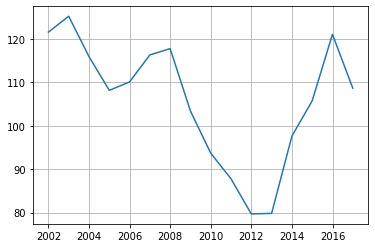

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

data = fx_jpusdata.resample('Y').mean()
plt.plot( data )
plt.grid(True)

### 6.4.2 移動平均
キーワード：移動平均

次に、時系列のデータ処理でよく使われる移動平均の処理方法をみていきます。さきほど扱った`fx_jpusdata`のデータについて、3日間の移動平均線を作成することを考えます。まず先頭から5行のデータを取り出してみます。

In [0]:
fx_jpusdata.head()

結果を見るとわかるように、2001-01-04までのデータは、2001-01-02が114.73、2001-01-03が114.26、2001-01-04が115.47ですから、その平均を計算すると114.82です。同様にして、2001-01-05、2001-01-06と続けて計算をしていきます。それにはPpandasの`rolling`メソッドを使うと、簡単に計算できます。以下は、その3日間の移動平均を計算した結果です。`rolling`メソッドを実行した後に、`mean`メソッドを使って平均を計算しています。

In [0]:
fx_jpusdata.rolling(3).mean().head()

移動平均ではなく標準偏差の推移を算出したいのなら、`mean`メソッドの代わりに`std`メソッドを使います。以下は3日間の標準偏差の推移です。

In [0]:
fx_jpusdata.rolling(3).std().head()

`rolling`メソッドには、パラメータが他にもいろいろとありますので、必要に応じて調べて実行してみてください。

以上で、Pandasの章は終了です。一部、なかなかイメージを掴みにくい箇所もあったかもしれません。しかし、実際に「こんな感じでデータ加工や変換したいのになあ」と思ったときに、ここを参考にしてプログラミングをしてみてください。データ加工処理のニーズが出てきて、実際に使うことで一層理解が進む箇所かもしれません。ここで紹介したテクニックはほんの一部です。この他にも、さまざまなデータ処理・加工方法があるので、参考文献「A-10」などを読んで、手を動かして実行してみてください。

>**[やってみよう]**
>
>ここで扱った集計軸以外にも、対象データに対していろいろな軸で処理をしてみましょう。

#### <練習問題 6-17>

<練習問題 6-16>で使用したfx_jpusdataを使って、20日間の移動平均データを作成してください。ただし`NaN`は削除してください。なお、レコードとして存在しないデータであれば、特に補填する必要はありません。

In [40]:
# fx_jpusdata.dropna().rolling(20).mean().dropna()
fx_jpusdata.rolling(20).mean().dropna()

,DEXJPUS
DATE,
2001-02-12,116.6910
2001-02-13,116.6920
2001-02-14,116.6070
2001-02-15,116.5015
2001-02-16,116.4130
...,...
2016-11-08,104.1600
2016-11-09,104.1780
2016-11-10,104.3250


***

## 6.5 総合問題

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### ■総合問題6-1 データ操作

3章で使用した、数学の成績を示すデータである「student-mat.csv」を使って、以下の問いに答えてください。

(1) 上記のデータに対して、年齢（`age`）×性別（`sex`）で`G1`の平均点を算出し、縦軸が年齢（`age`）、横軸が性別（`sex`）となるような表（テーブル）を作成しましょう。

(2) (1)で表示した結果テーブルについて、NaNになっている行（レコード）をすべて削除した結果を表示しましょう。

In [0]:
math_data = pd.read_csv('/content/drive/My Drive/DataScience/ds_samplefiles/student-mat.csv', sep=';')


In [46]:
table = pd.pivot_table( math_data, index='age', columns='sex', values='G1')
table

sex,F,M
age,,
15,10.052632,12.250000
16,10.203704,11.740000
17,11.103448,10.600000
18,10.883721,10.538462
19,10.642857,9.700000
20,15.000000,13.000000
21,NaN,10.000000
22,NaN,6.000000


In [47]:
table.dropna()

sex,F,M
age,,
15,10.052632,12.250000
16,10.203704,11.740000
17,11.103448,10.600000
18,10.883721,10.538462
19,10.642857,9.700000
20,15.000000,13.000000
